## Importing

In [49]:
import xarray as xr
import numpy as np

from tqdm.auto import tqdm

## Loading Datasets

In [ ]:
diatom_clusters = xr.open_dataset('/data/ibougoudis/MOAD/files/clustering_diatom.nc')

ds_clusters = xr.open_dataset('/data/ibougoudis/MOAD/files/clustering.nc')
drivers_clusters = ds_clusters.Clusters_Drivers

ds_variables = xr.open_dataset('/data/ibougoudis/MOAD/files/integrated_original.nc')
diatom = ds_variables.Diatom

In [74]:
coords = dict(cluster=range(0,6), time_counter=diatom.time_counter) 

clusters1 = xr.DataArray(coords=coords, dims = ['cluster', 'time_counter'])
clusters2 = xr.DataArray(coords=coords, dims = ['cluster', 'time_counter'])

for i in tqdm(range (0,6)):
    
    clusters1[:][i]=diatom.where(drivers_clusters==i).mean(['x','y'])
    clusters2[:][i]=diatom.where(diatom_clusters.Clusters_Diatom==i).mean(['x','y'])


  0%|          | 0/6 [00:00<?, ?it/s]

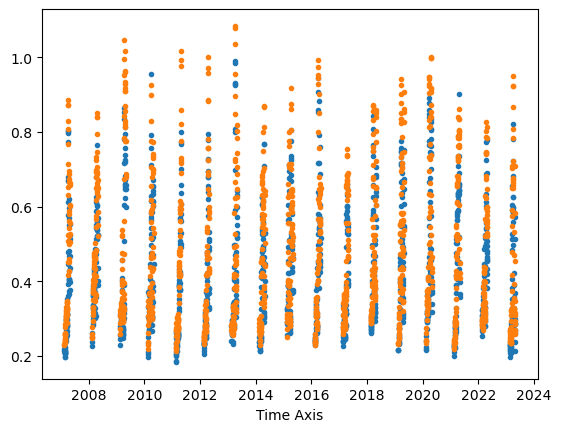

In [80]:
clusters1.max('cluster').plot(marker='.', linestyle='')
clusters2.max('cluster').plot(marker='.', linestyle='')

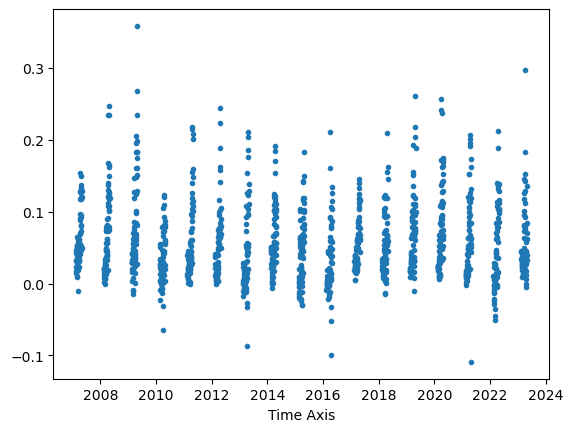

In [83]:
(clusters2.max('cluster') - clusters1.max('cluster')).plot( linestyle='', marker ='.')

In [121]:
clusters1[:,1]

<xarray.DataArray (cluster: 6)>
array([0.21258116, 0.1243697 , 0.16597055, 0.16710918, 0.14013866,
       0.15087   ])
Coordinates:
  * cluster       (cluster) int64 0 1 2 3 4 5
    time_counter  datetime64[ns] 2007-02-16T12:00:00

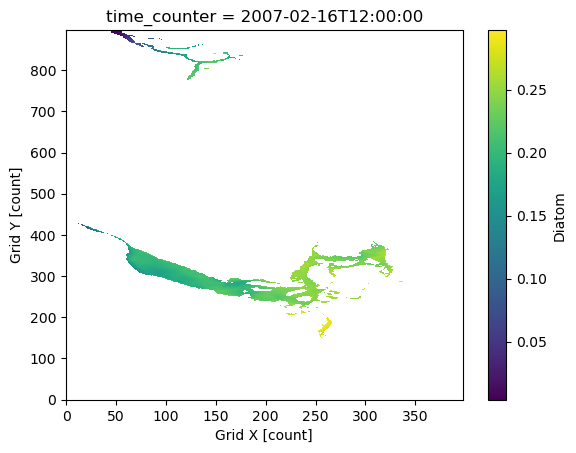

In [122]:
diatom[1].where(drivers_clusters[1]==0).plot()

In [120]:
clusters2[:,1]

<xarray.DataArray (cluster: 6)>
array([0.19107458, 0.23039971, 0.15666866, 0.17172714, 0.14086148,
       0.0958001 ])
Coordinates:
  * cluster       (cluster) int64 0 1 2 3 4 5
    time_counter  datetime64[ns] 2007-02-16T12:00:00

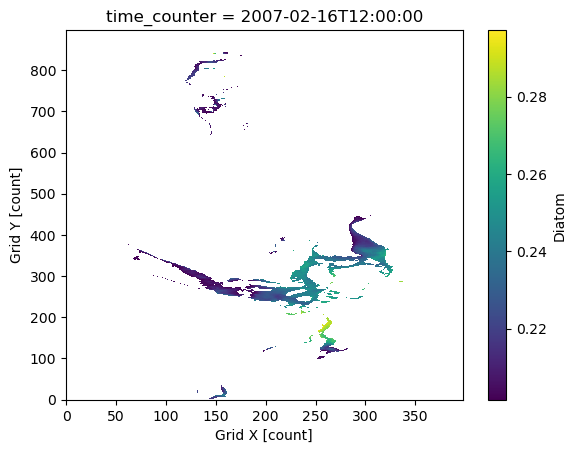

In [125]:
diatom[1].where(diatom_clusters.Clusters_Diatom[1]==1).plot()

In [141]:
np.where(clusters2.max('cluster') - clusters1.max('cluster') < 0)

(array([  32,   84,  162,  163,  166,  233,  237,  239,  247,  258,  260,
         261,  268,  273,  338,  390,  455,  456,  457,  459,  460,  461,
         471,  472,  473,  474,  476,  480,  485,  486,  487,  499,  500,
         501,  538,  539,  602,  603,  605,  606,  608,  609,  633,  634,
         637,  647,  650,  651,  652,  677,  678,  679,  680,  684,  686,
         687,  692,  705,  706,  708,  711,  712,  716,  717,  734,  742,
         743,  861,  862,  953, 1063, 1119, 1133, 1134, 1135, 1136, 1137,
        1138, 1139, 1140, 1142, 1143, 1144, 1151, 1152, 1173, 1174, 1269,
        1270]),)